# Representing data in memory

A typical program outline calls for us to load data from disk and place into memory organized into data structures. The way we represent data in memory is critical to building programs. This is particularly true with analytics programs because processing data is our focus.  

First, let's get something straight about data. Atomic data elements have *values* and *types*, such as `32` and *integer* or `"hi"` and *string*. We build the data structures by combining and organizing atomic data elements, such as a list of integers.

Next, let's take a small detour into computer architecture to get a handle on what it means to load something into memory.

## Computer architecture detour

A computer consists of three primary components: a disk to hold data, a memory (that is wiped upon power off), and a processor (CPU) to process that data. Here is a picture of an actual CPU and some memory chips:

<img src="images/cpu-memory.png" width="400">

Computer memory is much faster but usually much smaller than the disk and all memory is lost when the computer powers off. Think of memory as your working or scratch space and the disk as your permanent storage. Memory chips are kind of like human short-term memory that is prone to disappearing versus a piece of paper which is slower to read and write but *persistent*.

The memory is broken up into discrete cells of a fixed size. The size of a cell is one *byte*, which consists of 8 *bits*, binary on/off digits. It is sufficient to hold a number between 0 and 255. Each cell is identified by an integer address, just like the numbers on mailboxes (see image below and to the right). Processors can ask for the data at a particular address and can store a piece of data at a specific memory location as well. For example, here is an abstract representation of byte-addressable computer memory:

<table border="0">
<tr>
<td><img src="images/addresses.png" width="80">
<td><img src="images/mailboxes.png"  width="70">
</table>

In this case, the memory has value 100 at address 0. At address 1, the memory has value 0. Address 4 has the maximum value we can store in a single byte: 255. Everything from actual numbers to music to videos is stored using one or more of these atomic storage units called bytes.

## Programming language view of memory

Programming languages present us with a higher level view of the memory in two ways: we can use names to refer to locations in memory and each memory cell can hold integer and real number values of arbitrary size (they do have a limit, but let's keep things simple for now). For example, here are two named values stored in memory:

<img src="images/named-memory.png" width="90">

In [67]:
units = 923
price = 8.02

<img src="images/redbang.png" width="30" align="left">When referring to the kind of thing a value represents, we use the word **type**. The type of the "units" cell is integer and the type of "price" is real number (or floating-point number).

In [68]:
type(units)

int

In [69]:
type(price)

float

Another very common value type is *string*, which is really a list of characters. We use strings to hold place names, book titles, and any other text-based values.  We can think of strings as being a single value because the programming language hides the details.  Strings can be arbitrarily long and the programming language stores the characters as a sequence of bytes in memory. In other words, we think of it as

<img src="images/strings.png" width="110">

In [70]:
name = "Mary"

In [71]:
type(name)

str

but it is really more like this:

<img src="images/strings2.png" width="110">

Using package [lolviz](https://github.com/parrt/lolviz) we can visualize even simple types like strings:

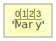

In [103]:
from lolviz import *
strviz(name)

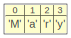

In [73]:
objviz(name) # render as list of char

These basic data types:

* integer numbers
* floating-point numbers
* strings

are our building blocks. If we arrange some of these blocks together, we can create more complex structures.

## Data structures

### List

The most common *data structures* is the **list**, which is just a sequence of memory cells.  Because we're all familiar with spreadsheets, let's visualize these data structures using a spreadsheet.  Columns in a spreadsheet are really lists, such as the following lists/columns of integers, floating-point numbers, and strings:

<img src="images/int-list.png" width="60">&nbsp;&nbsp;<img src="images/float-list.png" width="80">&nbsp;&nbsp;<img src="images/names-list.png" width="139">

In [74]:
Quantity = [6, 49, 27, 30, 19, 21, 12, 22, 21]

In [75]:
type(Quantity)

list

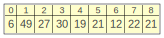

In [76]:
objviz(Quantity)

We can think of the rows of a spreadsheet as lists also. For example, the header row of a spreadsheet is really a list of strings:

<img src="images/header-row.png" width="750">

In [77]:
headers = ['Date', 'Quantity', 'Unit Price', 'Shipping']
type(headers)

list

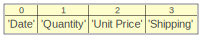

In [78]:
objviz(headers)

All of these lists have one thing in common: the type of element is the same. They are *homogeneous*. But, we can also have lists with *heterogeneous* elements, which is typically what we see in spreadsheet rows:

<img src="images/sample-row.png" width="800">

In [79]:
arow = ['10/13/10', 6, 38.94, 35, 'Muhammed MacIntyre']

or

In [80]:
from datetime import date
arow = [date(2010, 10, 13), 6, 38.94, 35, 'Muhammed MacIntyre']
arow

[datetime.date(2010, 10, 13), 6, 38.94, 35, 'Muhammed MacIntyre']

In [81]:
type(arow)

list

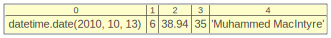

In [82]:
listviz(arow)

Heterogeneous lists are typically used to group bits of information about a particular entity. In machine learning, we call this a **feature vector**, an **instance**, or an **observation**.  For example, an apples versus oranges classifier might have feature vectors containing weight (number), volume (number), and color (string).  The important point here is that a list can also be used to as a way to aggregate features about a particular entity. The sequence of the elements is less important than the fact that they are contained (aggregated) within the same list. We will see this notion again when we talk about *tuples* in [Extracting information from text](text.ipynb).

### Set

If we enforce a rule that all elements within a list are unique, then we get a **set**. Sets are unordered.

In [83]:
ids = {100, 103, 121, 102, 113, 113, 113, 113}
ids

{100, 102, 103, 113, 121}

In [84]:
type(ids)

set

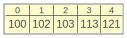

In [85]:
objviz(ids)

We can do lots of fun set arithmetic:

In [86]:
{100,102}.union({109})

{100, 102, 109}

In [87]:
{100,102}.intersection({100,119})

{100}

### Tables (list of lists)

Spreadsheets arrange rows one after the other, which programmers interpret as a *list of lists.* In the analytics or database world, we call this a **table**:

<img src="images/rows.png" width="700">

In this example, each row represents a sales transaction.

The input to machine learning algorithms is often a table where each row aggregates the data associated with a specific instance or observation. These tables are called **dataframes** and will become your BFF.

In [88]:
from pandas import DataFrame

df = DataFrame(data=[[99,'parrt'],[101,'sri'],[42,'kayla']],
               columns=['ID','user'])
df

,ID,user
0,99,parrt
1,101,sri
2,42,kayla


In [89]:
df.values

array([[99, 'parrt'],
       [101, 'sri'],
       [42, 'kayla']], dtype=object)

In [90]:
df.columns

Index(['ID', 'user'], dtype='object')

In [91]:
df.user

0    parrt
1      sri
2    kayla
Name: user, dtype: object

### Matrix

If the table elements are all numbers, we call it a **matrix**. Here's a matrix with 5 rows and 2 columns:

<img src="images/matrix.png" width="110">

Let me introduce you to another of your new BFF:

In [92]:
import numpy as np
A = np.array([[19,11],
              [21,15],
              [103,18],
              [99,13],
              [8,2]])
print(A)

[[ 19  11]
 [ 21  15]
 [103  18]
 [ 99  13]
 [  8   2]]


In [93]:
A.shape

(5, 2)

We can do lots of matrix math with numpy:

In [94]:
print(A+A)

[[ 38  22]
 [ 42  30]
 [206  36]
 [198  26]
 [ 16   4]]


In [95]:
print(A*99)

[[ 1881  1089]
 [ 2079  1485]
 [10197  1782]
 [ 9801  1287]
 [  792   198]]


In [96]:
A.T #transpose

array([[ 19,  21, 103,  99,   8],
       [ 11,  15,  18,  13,   2]])

Systems of equations: $A x = b$, $x = A^{-1} b$:

\begin{equation*}
\begin{bmatrix}
38 & 22\\
42 & 30
\end{bmatrix}
\begin{bmatrix}
x_1  \\
x_2 
\end{bmatrix} =
\begin{bmatrix}
3 \\
5 
\end{bmatrix}
\end{equation*}

In [97]:
from numpy.linalg import inv
A = np.array([[38, 22], [42, 30]])
b = np.array([3, 5])
x = inv(A).dot(b)
print(x)

[-0.09259259  0.2962963 ]


In [98]:
x = np.array([3, 5])     # vertical vector with 2 rows
y = np.array([[3, 5]])   # matrix with 1 row and 2 columns
z = np.array([[3],[5]])  # matrix with 2 rows, 1 column
print(x.shape)
print(y.shape)
print(z.shape)

(2,)
(1, 2)
(2, 1)


### Dictionary

If we arrange two lists side-by-side and kind of glue them together, we get a **dictionary**. Dictionaries map one value to another, just like a dictionary in the real world maps a word to a definition.  Here is a sample dictionary that maps a movie title to the year it was nominated for an Oscar award:

<img src="images/dict.png" width="220">

In [99]:
movies = {'Amadeus':1984, 'Witness':1985}
print(type(movies))
print(movies)

<class 'dict'>
{'Amadeus': 1984, 'Witness': 1985}


In [100]:
print(movies.keys())
print(movies.values())

dict_keys(['Amadeus', 'Witness'])
dict_values([1984, 1985])


In [101]:
movies['Amadeus']

1984

In [102]:
movies['foo'] # gets a KeyError

KeyError: 'foo'

## Traversing data structures

The spreadsheet model is a good one for understanding data structures but it's important to keep in mind that computers process one element (number or string) at a time.
As humans, we can look at the spreadsheet or data structure from above in its entirety, but programs must **walk** or **traverse** the elements of a data structure one after the other. It's kind of like sliding a magnifying glass over the elements of a list:

<img src="images/int-list-item.png" width="230">

This notion of traversal abstracts to any **sequence** (or **stream**) of elements, not just lists. For example, we will eventually traverse the lines of a text file or a sequence of filenames obtained from the operating system. Sequences are extremely powerful because it allows us to process data that is much bigger than the memory of our computer. We can process the data piecemeal whereas a list requires all elements to be in memory at once.

For lists and other structures that fit completely in memory, we often find a **reverse traversal** useful, that examines elements from last to first.

## Summary

Here are the commonly-used data types:

* integer numbers like -2, 0, 99
* real numbers (floating-point numbers) like -2.3, 99.1932
* strings like "Mary", "President Obama"

And here are the commonly-used data structures:

* ordered list
* set (just an unordered, unique list)
* list of lists such as tables or matrices with rows and columns 
* dictionary such as mapping a student name to their student ID; we can think of this as a table where each row in the table associates the key with a value.

Now that we know what data looks like in memory, let's consider a small but powerful set of possible operations we can do on that data in [Common Programming Operations](operations.md).